## Analisis de QuantStats

In [ ]:
# import pandas as pd
# import quantstats as qs

# # Leer el archivo CSV en un DataFrame de pandas
# df = pd.read_csv('listOfTrades_ApolloFx.csv', parse_dates=['Close time'], index_col='Close time')

# # Ordenar el DataFrame por la fecha, ya que QuantStats requiere que los datos estén en orden cronológico
# df.sort_index(inplace=True)

# df = df[df['Profit/Loss'] != 0]

# #Calculo de retorno mensual en $
# monthly_returns = df['Profit/Loss'].resample('M').sum()

# balance_inicial = 500
# df['Balance'] = df['Profit/Loss'].cumsum() + balance_inicial

# # # Convertir los beneficios en retornos, dividiendo por el balance acumulado
# # df['returns'] = df['Balance'].pct_change()

# # # Eliminar cualquier valor nulo que pueda haber resultado de la llamada a pct_change()
# # returns = df['returns'].dropna()

# # # Realizar un análisis completo de los retornos
# # qs.reports.full(returns)


## Retornos con distribución normal?

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Prueba de Shapiro-Wilk: W=0.19862300157546997, p=0.0
Prueba de Kolmogorov-Smirnov: statistic=0.4950122540814107, p=0.0


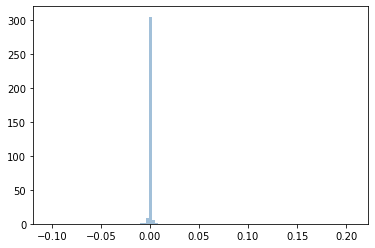

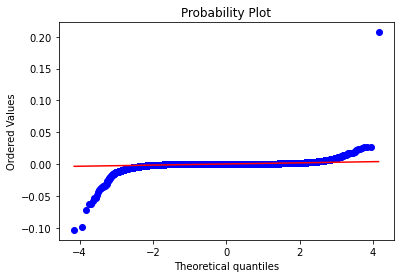

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

# Supongamos que los retornos están en un archivo CSV en la columna 'Retornos'
data = pd.read_csv('listOfTrades_ApolloFx.csv', parse_dates=['Close time'], index_col='Close time')

balance_inicial = 500
df['Balance'] = df['Profit/Loss'].cumsum() + balance_inicial

# Convertir los beneficios en retornos, dividiendo por el balance acumulado
df['returns'] = df['Balance'].pct_change()

# Eliminar cualquier valor nulo que pueda haber resultado de la llamada a pct_change()
returns = df['returns'].dropna()


'''Acá se revisa si los retornos tienen una distribución normal'''

# Prueba de Shapiro-Wilk
w, p = stats.shapiro(returns)
print(f"Prueba de Shapiro-Wilk: W={w}, p={p}")

# Prueba de Kolmogorov-Smirnov
ks_stat, ks_p = stats.kstest(returns, 'norm')
print(f"Prueba de Kolmogorov-Smirnov: statistic={ks_stat}, p={ks_p}")

# Histograma
plt.hist(returns, bins=100, density=True, alpha=0.5, color='steelblue', edgecolor='none')
plt.show()

# Gráfico QQ
stats.probplot(returns, plot=plt)
plt.show()


## Pruebas VaR y CVaR

In [19]:
'''medidas de riesgo que si asumen una distribución normal'''

# Suponiendo que 'returns' es tu Serie de pandas de retornos
mean = returns.mean()
std_dev = returns.std()

# Nivel de confianza
confidence_level = 0.05

VaR = norm.ppf(confidence_level, mean, std_dev)

print('VaR at {} confidence level: {}'.format(100*confidence_level, VaR*100))


'''medidas de riesgo que no asumen una distribución normal'''

# Prueba CVaR
alpha = 0.05  # Nivel de confianza
VaR = np.percentile(returns, 100*alpha)
CVaR = returns[returns <= VaR].mean()

print('CVaR at {} confidence level: {}'.format(100*alpha, CVaR*100))


'''Los resultados se leen: 
Un CVaR/VaR de X.x%, implica que, dado que ocurre un evento 
que se encuentra en el 5% de los peores casos, la pérdida esperada 
sería aproximadamente del X.x% del valor del portafolio.
'''

VaR at 5.0 confidence level: -0.32372966782482776
CVaR at 5.0 confidence level: -0.3032857421056463
